In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key as api_key
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hovd mn
mvangue cm
aksarka ru
nikolskoye ru
sisimiut gl
vaini to
torbay ca
bria cf
gorno-chuyskiy ru
hithadhoo mv
fortuna us
mataura pf
hermanus za
kapaa us
albany au
cape town za
tsihombe mg
clyde river ca
punta arenas cl
trinidad co
lavrentiya ru
nome us
mys shmidta ru
lolua tv
albany au
chokurdakh ru
kruglolesskoye ru
ushuaia ar
illoqqortoormiut gl
barrow us
albany au
mataura pf
vaini to
deputatskiy ru
jamestown sh
mehamn no
jamestown sh
hilo us
umzimvubu za
clyde river ca
ushuaia ar
bang saphan th
mys shmidta ru
takoradi gh
shepsi ru
flinders au
kidal ml
avarua ck
richards bay za
wahran dz
dikson ru
bilma ne
bom jesus br
avarua ck
sorong id
punta arenas cl
amderma ru
busselton au
labutta mm
alofi nu
mataura pf
hilo us
barrow us
albany au
saint-philippe re
nsanje mw
farafangana mg
palabuhanratu id
vila vu
quelimane mz
ikovka ru
fare pf
cap malheureux mu
khanpur pk
morehead pg
new ulm us
tiksi ru
clyde river ca
tilichiki ru
canon city us
busselton au
porosozero ru
busselton au
avarua

saldanha za
ponta do sol cv
codrington ag
bluff nz
severo-kurilsk ru
ahuimanu us
lebu cl
provideniya ru
hermanus za
chokurdakh ru
yaring th
georgetown sh
aragats am
butaritari ki
ushuaia ar
mataura pf
rawson ar
hermanus za
taolanaro mg
busselton au
ushuaia ar
rikitea pf
abha sa
new norfolk au
meulaboh id
yangambi cd
ushuaia ar
hilo us
rikitea pf
mahon es
doctor pedro p. pena py
kapaa us
the valley ai
albany au
avarua ck
teneguiban ph
busselton au
provideniya ru
hofn is
hermanus za
fairbanks us
ilulissat gl
mendi et
vaini to
avarua ck
port elizabeth za
eidsvag no
kapaa us
grand centre ca
sokna no
new norfolk au
chernyshevskiy ru
port elizabeth za
sukhobuzimskoye ru
saint george bm
ushuaia ar
hobart au
albany au
vila franca do campo pt
ushuaia ar
vaini to
mar del plata ar
hilo us
busselton au
punta arenas cl
dongli cn
souillac mu
barrow us
cape town za
mataura pf
lebu cl
punta arenas cl
bethel us
harihar in
naze jp
port elizabeth za
kapaa us
butaritari ki
rikitea pf
sao filipe cv
albany 

hermanus za
inverell au
latung ph
samalaeulu ws
hobart au
hithadhoo mv
southbridge nz
punta arenas cl
mataura pf
magangue co
balkanabat tm
ponta do sol cv
chaparral co
puerto ayora ec
coquimbo cl
maniitsoq gl
mandalgovi mn
mataura pf
yaan cn
saint-philippe re
puerto escondido mx
hermanus za
vaini to
sept-iles ca
hobart au
punta arenas cl
hasaki jp
mataura pf
kununurra au
majene id
butaritari ki
athabasca ca
nikolskoye ru
busselton au
belushya guba ru
adrar dz
rikitea pf
puerto leguizamo co
rikitea pf
port alfred za
busselton au
kiama au
amderma ru
sola vu
taolanaro mg
north bend us
cape town za
numan ng
jamestown sh
xuddur so
prince rupert ca
port alfred za
mys shmidta ru
ushuaia ar
albany au
buraydah sa
port elizabeth za
kapaa us
coquimbo cl
vaini to
rungata ki
puerto escondido mx
narsaq gl
saint george bm
punta arenas cl
yumen cn
hobart au
ushuaia ar
ribeira grande pt
aasiaat gl
guerrero negro mx
likasi cd
rocha uy
hasaki jp
rawson ar
nikolskoye ru
bengkulu id
atuona pf
mahebourg mu


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# bach impose url specification from 6/Monday/07
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"

# Build query URL
#url = url +"q=" + city + "&appid=" +api_key
#now = requests.get(url)
#print(url)#now

In [6]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 5 == 0 and i >= 10):
    if (i % 50 == 0 and i >= 50):
        time.sleep(60)
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") +"&appid=" +api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hovd
Processing Record 2 of Set 1 | mvangue
Processing Record 3 of Set 1 | aksarka
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | sisimiut
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | trinidad
Processing Record 21 of Set 1 | lavrentiya
Processing Record 22 of Set 1 | nom

Processing Record 35 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 4 | rujewa
Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | wum
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | srednekolymsk
Processing Record 41 of Set 4 | walvis bay
Processing Record 42 of Set 4 | ranong
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | ballina
Processing Record 46 of Set 4 | andrieseni
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | barahona
Processing Record 50 of Set 4 | tomatlan
Processing Record 1 of Set 5 | svetlogorsk
Processing Record 2 of Set 5 | rabo de peixe
Processing Record 3 of Set 5 | itarema
Processing Record 4 of Set 5 | leh
Processing Record 5 of Set 5 | belle glade
Processing Record 6 of Set 5 | aldan
Processing Record 7 of Set 5 | burnie
Pr

Processing Record 26 of Set 8 | dujuma
City not found. Skipping...
Processing Record 27 of Set 8 | jinchang
Processing Record 28 of Set 8 | millinocket
Processing Record 29 of Set 8 | madawaska
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | krasnoye
Processing Record 32 of Set 8 | palmerston
Processing Record 33 of Set 8 | faanui
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | ust-tsilma
Processing Record 38 of Set 8 | itamaraca
Processing Record 39 of Set 8 | booue
Processing Record 40 of Set 8 | rorvik
Processing Record 41 of Set 8 | gigmoto
Processing Record 42 of Set 8 | neiafu
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 8 | grand gaube
Processing Record 46 of Set 8 | port hedland
Processing Record 47 of Set 8 | shumskiy
Processing Record 48 of Set 8 | nusaybi

City not found. Skipping...
Processing Record 18 of Set 12 | utiroa
City not found. Skipping...
Processing Record 19 of Set 12 | camana
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | ellensburg
Processing Record 22 of Set 12 | grand island
Processing Record 23 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 24 of Set 12 | salme
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | paraje nuevo
Processing Record 27 of Set 12 | fulitun
City not found. Skipping...
Processing Record 28 of Set 12 | azul
Processing Record 29 of Set 12 | inverell
Processing Record 30 of Set 12 | latung
Processing Record 31 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 12 | magangue
Processing Record 33 of Set 12 | balkanabat
Processing Record 34 of Set 12 | chaparral
Processing Record 35 of Set 12 | maniitsoq
Processing Record 36 of Set 12 | yaan
Processing Record 37 of Set 12 | puerto escondido
Processing Record

In [7]:
print(len(cities))

602


In [8]:
cities


['hovd',
 'mvangue',
 'aksarka',
 'nikolskoye',
 'sisimiut',
 'vaini',
 'torbay',
 'bria',
 'gorno-chuyskiy',
 'hithadhoo',
 'fortuna',
 'mataura',
 'hermanus',
 'kapaa',
 'albany',
 'cape town',
 'tsihombe',
 'clyde river',
 'punta arenas',
 'trinidad',
 'lavrentiya',
 'nome',
 'mys shmidta',
 'lolua',
 'chokurdakh',
 'kruglolesskoye',
 'ushuaia',
 'illoqqortoormiut',
 'barrow',
 'deputatskiy',
 'jamestown',
 'mehamn',
 'hilo',
 'umzimvubu',
 'bang saphan',
 'takoradi',
 'shepsi',
 'flinders',
 'kidal',
 'avarua',
 'richards bay',
 'wahran',
 'dikson',
 'bilma',
 'bom jesus',
 'sorong',
 'amderma',
 'busselton',
 'labutta',
 'alofi',
 'saint-philippe',
 'nsanje',
 'farafangana',
 'palabuhanratu',
 'vila',
 'quelimane',
 'ikovka',
 'fare',
 'cap malheureux',
 'khanpur',
 'morehead',
 'new ulm',
 'tiksi',
 'tilichiki',
 'canon city',
 'porosozero',
 'provideniya',
 'maneromango',
 'marzuq',
 'taolanaro',
 'tarudant',
 'beringovskiy',
 'bremervorde',
 'pangnirtung',
 'portland',
 'ancud'

In [9]:
city_data


[{'City': 'Hovd',
  'Lat': 48.0056,
  'Lng': 91.6419,
  'Max Temp': 275.77,
  'Humidity': 45,
  'Cloudiness': 97,
  'Wind Speed': 0.37,
  'Country': 'MN',
  'Date': '2021-05-21 16:39:50'},
 {'City': 'Mvangue',
  'Lat': 2.9667,
  'Lng': 11.5167,
  'Max Temp': 295.88,
  'Humidity': 96,
  'Cloudiness': 99,
  'Wind Speed': 0.9,
  'Country': 'CM',
  'Date': '2021-05-21 16:39:51'},
 {'City': 'Aksarka',
  'Lat': 66.5606,
  'Lng': 67.7975,
  'Max Temp': 294.23,
  'Humidity': 52,
  'Cloudiness': 24,
  'Wind Speed': 3.63,
  'Country': 'RU',
  'Date': '2021-05-21 16:39:51'},
 {'City': 'Nikolskoye',
  'Lat': 59.7035,
  'Lng': 30.7861,
  'Max Temp': 285.04,
  'Humidity': 89,
  'Cloudiness': 97,
  'Wind Speed': 4.56,
  'Country': 'RU',
  'Date': '2021-05-21 16:39:52'},
 {'City': 'Sisimiut',
  'Lat': 66.9395,
  'Lng': -53.6735,
  'Max Temp': 274.85,
  'Humidity': 70,
  'Cloudiness': 100,
  'Wind Speed': 11.68,
  'Country': 'GL',
  'Date': '2021-05-21 16:39:53'},
 {'City': 'Vaini',
  'Lat': -21.2,
  '

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.0056,91.6419,275.77,45,97,0.37,MN,2021-05-21 16:39:50
1,Mvangue,2.9667,11.5167,295.88,96,99,0.90,CM,2021-05-21 16:39:51
2,Aksarka,66.5606,67.7975,294.23,52,24,3.63,RU,2021-05-21 16:39:51
3,Nikolskoye,59.7035,30.7861,285.04,89,97,4.56,RU,2021-05-21 16:39:52
4,Sisimiut,66.9395,-53.6735,274.85,70,100,11.68,GL,2021-05-21 16:39:53
5,Vaini,-21.2000,-175.2000,299.24,89,75,6.17,TO,2021-05-21 16:39:53
6,Torbay,47.6666,-52.7314,293.98,45,40,10.80,CA,2021-05-21 16:39:54
7,Bria,6.5423,21.9863,297.20,71,79,0.64,CF,2021-05-21 16:39:54
8,Hithadhoo,-0.6000,73.0833,302.06,71,25,2.36,MV,2021-05-21 16:39:55
9,Fortuna,40.5982,-124.1573,286.75,64,1,3.13,US,2021-05-21 16:37:13


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2021-05-21 16:39:50,48.0056,91.6419,275.77,45,97,0.37
1,Mvangue,CM,2021-05-21 16:39:51,2.9667,11.5167,295.88,96,99,0.90
2,Aksarka,RU,2021-05-21 16:39:51,66.5606,67.7975,294.23,52,24,3.63
3,Nikolskoye,RU,2021-05-21 16:39:52,59.7035,30.7861,285.04,89,97,4.56
4,Sisimiut,GL,2021-05-21 16:39:53,66.9395,-53.6735,274.85,70,100,11.68
...,...,...,...,...,...,...,...,...,...
551,Yumen,CN,2021-05-21 16:55:57,40.2833,97.2000,286.02,50,100,3.94
552,Aasiaat,GL,2021-05-21 16:55:58,68.7098,-52.8699,273.69,76,100,6.21
553,Likasi,CD,2021-05-21 16:55:08,-10.9814,26.7333,290.14,59,10,0.76
554,Rocha,UY,2021-05-21 16:56:59,-34.4833,-54.3333,290.47,72,100,7.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

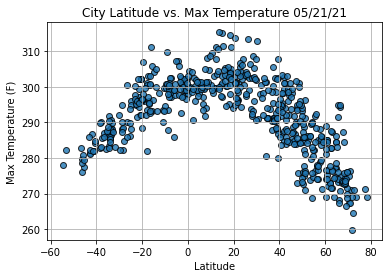

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

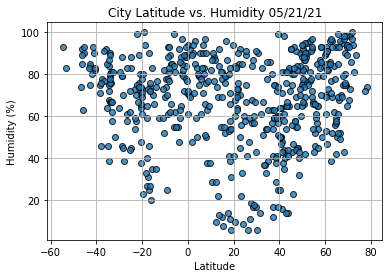

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

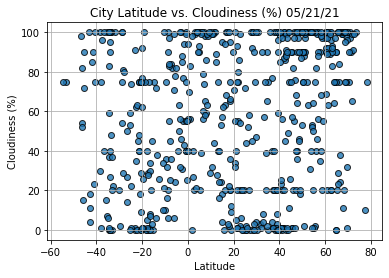

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

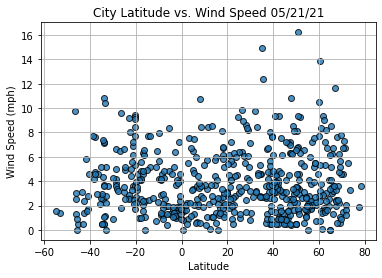

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()